In [1]:
# Import required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

from io import StringIO
from requests import\
    get as reqGet,\
    post as reqPost
from bs4 import BeautifulSoup

from math import sqrt
from statsmodels.formula import\
    api as sm
from scipy.stats import\
    ttest_ind as t_Test,\
    f_oneway as f_Test
from sklearn.metrics import\
    mean_squared_error as MSE,\
    mean_absolute_error as MAE,\
    r2_score as R2

Get data e-Solat JAKIM saved in CSV

In [2]:
import os
current_dir = os.getcwd()

In [3]:
csv_dir = current_dir + "\\data extraction and cleanup\\esolat2018to2025.csv"
esolatDF = pd.read_csv(csv_dir)

In [4]:
esolatDF

,date,fajr,zuhr,asr,maghrib,isha
0,2018-01-01,05:58:00,13:19:00,16:42:00,19:16:00,20:30:00
1,2018-01-02,05:58:00,13:20:00,16:42:00,19:16:00,20:31:00
2,2018-01-03,05:59:00,13:20:00,16:43:00,19:17:00,20:31:00
3,2018-01-04,05:59:00,13:21:00,16:43:00,19:17:00,20:32:00
4,2018-01-05,06:00:00,13:21:00,16:44:00,19:18:00,20:32:00
...,...,...,...,...,...,...
2917,2025-12-27,06:04:00,13:17:00,16:40:00,19:14:00,20:29:00
2918,2025-12-28,06:04:00,13:18:00,16:40:00,19:15:00,20:29:00
2919,2025-12-29,06:05:00,13:18:00,16:41:00,19:15:00,20:30:00
2920,2025-12-30,06:05:00,13:19:00,16:41:00,19:16:00,20:30:00


Get data Google Search saved in TXT

In [5]:
txt_dir = current_dir + "\\data extraction and cleanup\\htmldata\\googlesearch_2024_12.txt"
googleDF = pd.read_html(txt_dir)[0]
googleDF[0][0] = "2024"
googleDF[3][0] = "Zuhr"
googleDF.columns = googleDF.iloc[0]
googleDF = googleDF[1:].reset_index(drop=True)

In [6]:
googleDF

,2024,Fajr,Sunrise,Zuhr,Asr,Maghrib,Isha
0,30 Nov,05:52,07:03,13:03,16:27,19:02,20:16
1,1 Dec,05:52,07:04,13:03,16:27,19:02,20:16
2,2 Dec,05:52,07:04,13:04,16:28,19:02,20:17
3,3 Dec,05:53,07:05,13:04,16:28,19:03,20:17
4,4 Dec,05:53,07:05,13:04,16:29,19:03,20:17
5,5 Dec,05:53,07:05,13:05,16:29,19:03,20:18
6,6 Dec,05:54,07:06,13:05,16:29,19:04,20:18
7,7 Dec,05:54,07:06,13:06,16:30,19:04,20:19
8,8 Dec,05:55,07:07,13:06,16:30,19:05,20:19
9,9 Dec,05:55,07:07,13:06,16:31,19:05,20:20


Data Transformation to Total Minutes

In [7]:
def getColumnTimeInTotalMins(col_df = []):
    col = []

    if (len(col_df) > 0):
        for i in range(len(col_df)):
            t = col_df[i]
            col.append(t.hour * 60 + t.minute)
        
    return col

In [8]:
esolatDate = pd.to_datetime(esolatDF["date"]).dt.date
esolatFajr = pd.to_datetime(esolatDF["fajr"], format="%H:%M:%S").dt.time
esolatZuhr = pd.to_datetime(esolatDF["zuhr"], format="%H:%M:%S").dt.time
esolatAsr = pd.to_datetime(esolatDF["asr"], format="%H:%M:%S").dt.time
esolatMaghrib = pd.to_datetime(esolatDF["maghrib"], format="%H:%M:%S").dt.time
esolatIsha = pd.to_datetime(esolatDF["isha"], format="%H:%M:%S").dt.time
copiedEsolatDF = pd.DataFrame([esolatDate,esolatFajr,esolatZuhr,esolatAsr,esolatMaghrib,esolatIsha]).transpose()

In [9]:
copiedEsolatDF

,date,fajr,zuhr,asr,maghrib,isha
0,2018-01-01,05:58:00,13:19:00,16:42:00,19:16:00,20:30:00
1,2018-01-02,05:58:00,13:20:00,16:42:00,19:16:00,20:31:00
2,2018-01-03,05:59:00,13:20:00,16:43:00,19:17:00,20:31:00
3,2018-01-04,05:59:00,13:21:00,16:43:00,19:17:00,20:32:00
4,2018-01-05,06:00:00,13:21:00,16:44:00,19:18:00,20:32:00
...,...,...,...,...,...,...
2917,2025-12-27,06:04:00,13:17:00,16:40:00,19:14:00,20:29:00
2918,2025-12-28,06:04:00,13:18:00,16:40:00,19:15:00,20:29:00
2919,2025-12-29,06:05:00,13:18:00,16:41:00,19:15:00,20:30:00
2920,2025-12-30,06:05:00,13:19:00,16:41:00,19:16:00,20:30:00


In [10]:
copiedEsolatDF2 = copiedEsolatDF.copy()
copiedEsolatDF2["fajr"] = getColumnTimeInTotalMins(copiedEsolatDF2["fajr"])
copiedEsolatDF2["zuhr"] = getColumnTimeInTotalMins(copiedEsolatDF2["zuhr"])
copiedEsolatDF2["asr"] = getColumnTimeInTotalMins(copiedEsolatDF2["asr"])
copiedEsolatDF2["maghrib"] = getColumnTimeInTotalMins(copiedEsolatDF2["maghrib"])
copiedEsolatDF2["isha"] = getColumnTimeInTotalMins(copiedEsolatDF2["isha"])

In [11]:
copiedEsolatDF2

,date,fajr,zuhr,asr,maghrib,isha
0,2018-01-01,358,799,1002,1156,1230
1,2018-01-02,358,800,1002,1156,1231
2,2018-01-03,359,800,1003,1157,1231
3,2018-01-04,359,801,1003,1157,1232
4,2018-01-05,360,801,1004,1158,1232
...,...,...,...,...,...,...
2917,2025-12-27,364,797,1000,1154,1229
2918,2025-12-28,364,798,1000,1155,1229
2919,2025-12-29,365,798,1001,1155,1230
2920,2025-12-30,365,799,1001,1156,1230


In [12]:
googleDate = pd.to_datetime(googleDF["2024"].astype(str) + " 2024", format="%d %b %Y").dt.date
googleFajr = pd.to_datetime(googleDF["Fajr"], format="%H:%M").dt.time
googleZuhr = pd.to_datetime(googleDF["Zuhr"], format="%H:%M").dt.time
googleAsr = pd.to_datetime(googleDF["Asr"], format="%H:%M").dt.time
googleMaghrib = pd.to_datetime(googleDF["Maghrib"], format="%H:%M").dt.time
googleIsha = pd.to_datetime(googleDF["Isha"], format="%H:%M").dt.time
copiedGoogleDF = pd.DataFrame([googleDate,googleFajr,googleZuhr,googleAsr,googleMaghrib,googleIsha]).transpose()

In [13]:
copiedGoogleDF

,2024,Fajr,Zuhr,Asr,Maghrib,Isha
0,2024-11-30,05:52:00,13:03:00,16:27:00,19:02:00,20:16:00
1,2024-12-01,05:52:00,13:03:00,16:27:00,19:02:00,20:16:00
2,2024-12-02,05:52:00,13:04:00,16:28:00,19:02:00,20:17:00
3,2024-12-03,05:53:00,13:04:00,16:28:00,19:03:00,20:17:00
4,2024-12-04,05:53:00,13:04:00,16:29:00,19:03:00,20:17:00
5,2024-12-05,05:53:00,13:05:00,16:29:00,19:03:00,20:18:00
6,2024-12-06,05:54:00,13:05:00,16:29:00,19:04:00,20:18:00
7,2024-12-07,05:54:00,13:06:00,16:30:00,19:04:00,20:19:00
8,2024-12-08,05:55:00,13:06:00,16:30:00,19:05:00,20:19:00
9,2024-12-09,05:55:00,13:06:00,16:31:00,19:05:00,20:20:00


In [14]:
copiedGoogleDF2 = copiedGoogleDF.copy()
copiedGoogleDF2["Fajr"] = getColumnTimeInTotalMins(copiedGoogleDF2["Fajr"])
copiedGoogleDF2["Zuhr"] = getColumnTimeInTotalMins(copiedGoogleDF2["Zuhr"])
copiedGoogleDF2["Asr"] = getColumnTimeInTotalMins(copiedGoogleDF2["Asr"])
copiedGoogleDF2["Maghrib"] = getColumnTimeInTotalMins(copiedGoogleDF2["Maghrib"])
copiedGoogleDF2["Isha"] = getColumnTimeInTotalMins(copiedGoogleDF2["Isha"])

In [15]:
copiedGoogleDF2

,2024,Fajr,Zuhr,Asr,Maghrib,Isha
0,2024-11-30,352,783,987,1142,1216
1,2024-12-01,352,783,987,1142,1216
2,2024-12-02,352,784,988,1142,1217
3,2024-12-03,353,784,988,1143,1217
4,2024-12-04,353,784,989,1143,1217
5,2024-12-05,353,785,989,1143,1218
6,2024-12-06,354,785,989,1144,1218
7,2024-12-07,354,786,990,1144,1219
8,2024-12-08,355,786,990,1145,1219
9,2024-12-09,355,786,991,1145,1220


Data Distribution

In [16]:
def plot_dist(df, cols):
    if (len(cols) == 0):
        return print("No data to plot")
    
    sns.pairplot(df, vars=cols, markers=".")
    plt.show()

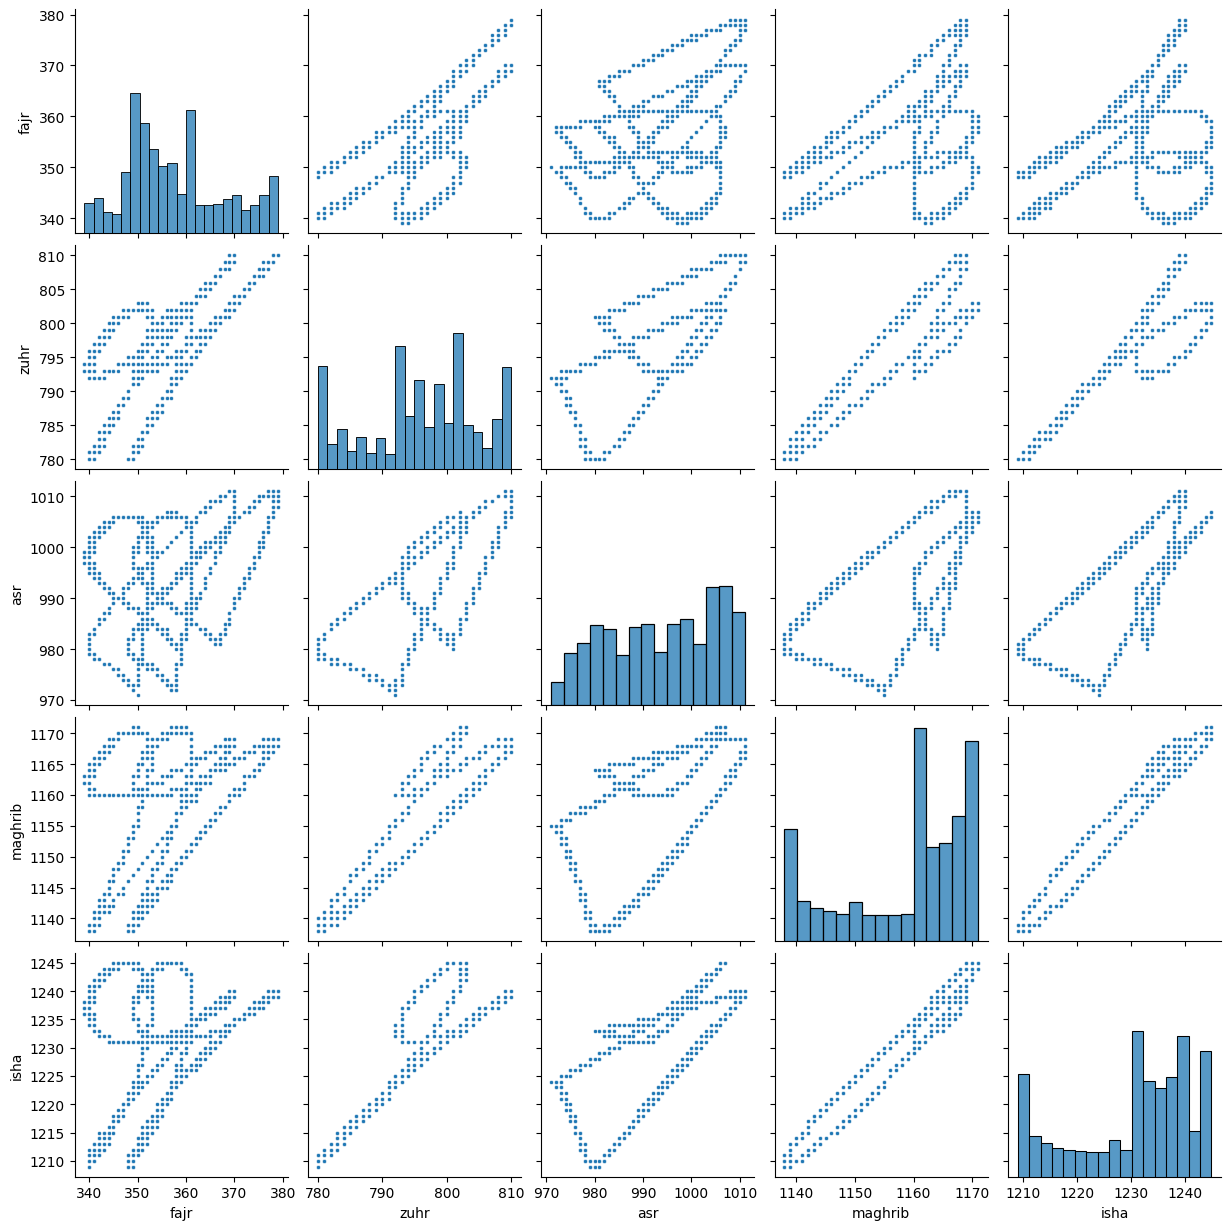

In [17]:
plot_dist(copiedEsolatDF2, ["fajr","zuhr","asr","maghrib","isha"])

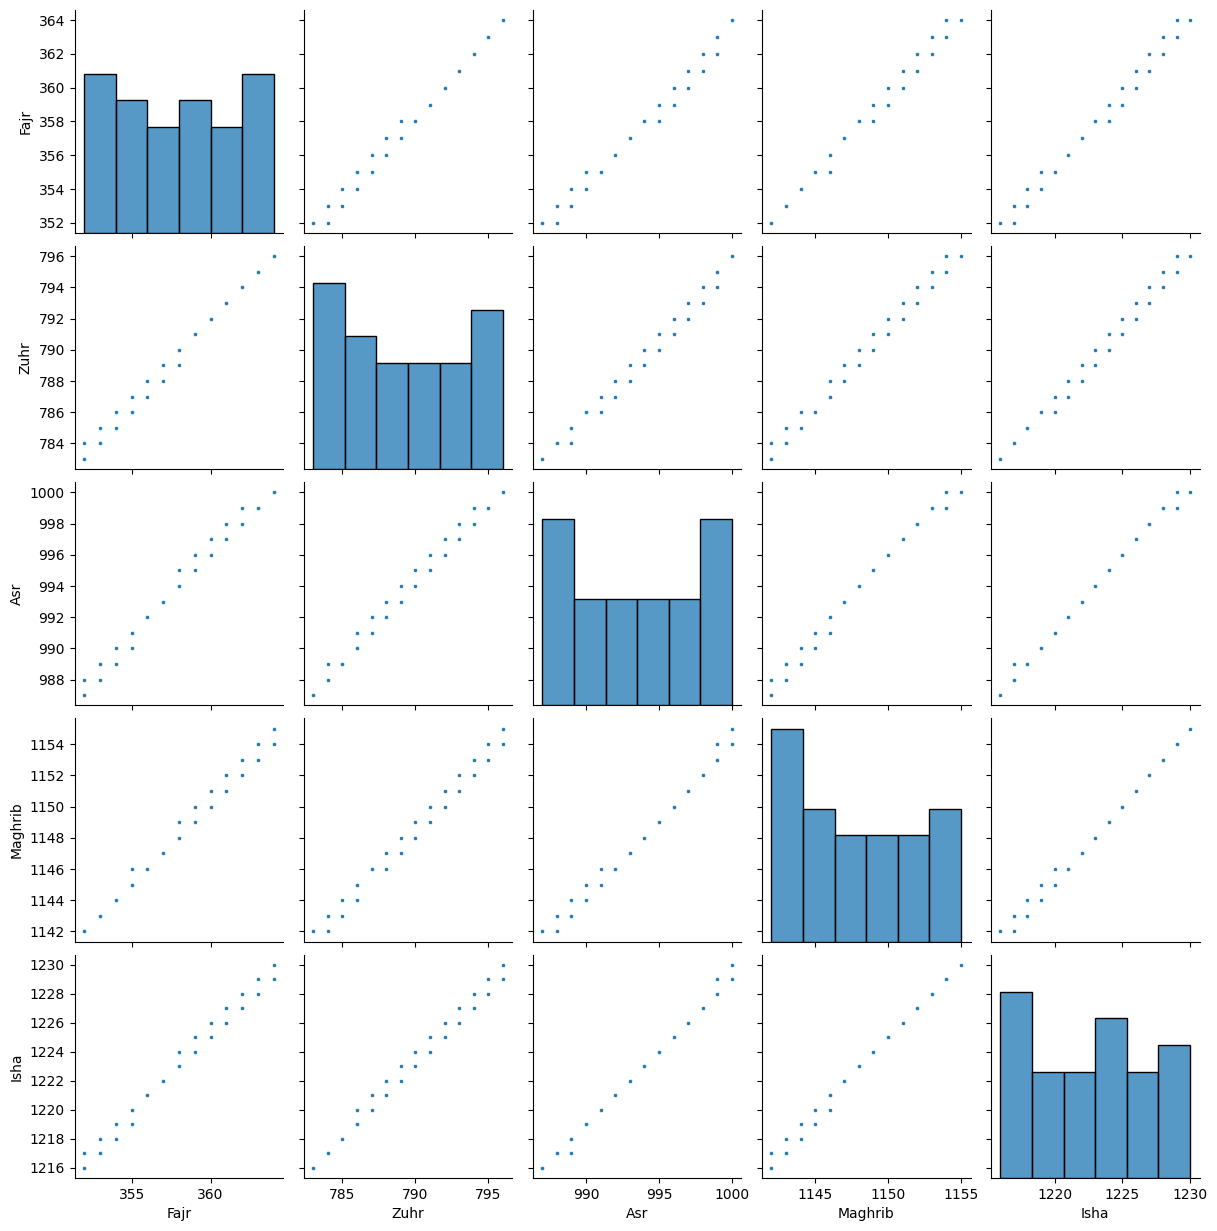

In [18]:
plot_dist(copiedGoogleDF2, ["Fajr","Zuhr","Asr","Maghrib","Isha"])

Objective 1

In [19]:
combine = copiedGoogleDF2.merge(copiedEsolatDF2, left_on="2024", right_on="date")
combine

,2024,Fajr,Zuhr,Asr,Maghrib,Isha,date,fajr,zuhr,asr,maghrib,isha
0,2024-11-30,352,783,987,1142,1216,2024-11-30,352,785,987,1142,1216
1,2024-12-01,352,783,987,1142,1216,2024-12-01,352,785,988,1142,1217
2,2024-12-02,352,784,988,1142,1217,2024-12-02,353,785,988,1143,1217
3,2024-12-03,353,784,988,1143,1217,2024-12-03,353,786,988,1143,1217
4,2024-12-04,353,784,989,1143,1217,2024-12-04,353,786,989,1144,1218
5,2024-12-05,353,785,989,1143,1218,2024-12-05,354,787,989,1144,1218
6,2024-12-06,354,785,989,1144,1218,2024-12-06,354,787,990,1144,1219
7,2024-12-07,354,786,990,1144,1219,2024-12-07,355,788,990,1145,1219
8,2024-12-08,355,786,990,1145,1219,2024-12-08,355,788,991,1145,1220
9,2024-12-09,355,786,991,1145,1220,2024-12-09,355,788,991,1146,1220


In [20]:
compareFajr = combine["fajr"] - combine["Fajr"]
compareZuhr = combine["zuhr"] - combine["Zuhr"]
compareAsr = combine["asr"] - combine["Asr"]
compareMaghrib = combine["maghrib"] - combine["Maghrib"]
compareIsha = combine["isha"] - combine["Isha"]
compareDF = pd.DataFrame([combine["date"],compareFajr,compareZuhr,compareAsr,compareMaghrib,compareIsha]).transpose()
compareDF.columns = ["date","diff_fajr","diff_zuhr","diff_asr","diff_maghrib","diff_isha"]

In [21]:
compareDF

,date,diff_fajr,diff_zuhr,diff_asr,diff_maghrib,diff_isha
0,2024-11-30,0,2,0,0,0
1,2024-12-01,0,2,1,0,1
2,2024-12-02,1,1,0,1,0
3,2024-12-03,0,2,0,0,0
4,2024-12-04,0,2,0,1,1
5,2024-12-05,1,2,0,1,0
6,2024-12-06,0,2,1,0,1
7,2024-12-07,1,2,0,1,0
8,2024-12-08,0,2,1,0,1
9,2024-12-09,0,2,0,1,0


Objective 2

In [22]:
normalizedEsolatDF = copiedEsolatDF2.copy()

for column in normalizedEsolatDF:
    if column == "date":
        continue
    
    normalizedEsolatDF[column] = (normalizedEsolatDF[column] - normalizedEsolatDF[column].min()) / (normalizedEsolatDF[column].max() - normalizedEsolatDF[column].min())

In [23]:
import datetime
startValidation = datetime.date(2024, 1, 1)
startTest = datetime.date(2025, 1, 1)

In [24]:
train = normalizedEsolatDF.loc[normalizedEsolatDF["date"] < startValidation]
train

,date,fajr,zuhr,asr,maghrib,isha
0,2018-01-01,0.475,0.633333,0.775,0.545455,0.583333
1,2018-01-02,0.475,0.666667,0.775,0.545455,0.611111
2,2018-01-03,0.500,0.666667,0.800,0.575758,0.611111
3,2018-01-04,0.500,0.700000,0.800,0.575758,0.638889
4,2018-01-05,0.525,0.700000,0.825,0.606061,0.638889
...,...,...,...,...,...,...
2186,2023-12-27,0.625,0.566667,0.700,0.484848,0.555556
2187,2023-12-28,0.625,0.566667,0.725,0.484848,0.555556
2188,2023-12-29,0.650,0.600000,0.725,0.515152,0.583333
2189,2023-12-30,0.650,0.600000,0.750,0.515152,0.583333


In [25]:
validation_mask = (normalizedEsolatDF["date"] >= startValidation) & (normalizedEsolatDF["date"] < startTest)
validation = normalizedEsolatDF.loc[validation_mask]
validation

,date,fajr,zuhr,asr,maghrib,isha
2191,2024-01-01,0.675,0.633333,0.775,0.545455,0.611111
2192,2024-01-02,0.700,0.666667,0.775,0.575758,0.611111
2193,2024-01-03,0.700,0.666667,0.800,0.575758,0.638889
2194,2024-01-04,0.725,0.700000,0.800,0.606061,0.638889
2195,2024-01-05,0.725,0.700000,0.825,0.606061,0.666667
...,...,...,...,...,...,...
2552,2024-12-27,0.625,0.566667,0.725,0.484848,0.555556
2553,2024-12-28,0.650,0.600000,0.725,0.515152,0.583333
2554,2024-12-29,0.650,0.600000,0.750,0.515152,0.583333
2555,2024-12-30,0.675,0.633333,0.750,0.545455,0.583333


In [26]:
test = normalizedEsolatDF.loc[normalizedEsolatDF["date"] >= startTest]
test

,date,fajr,zuhr,asr,maghrib,isha
2557,2025-01-01,0.700,0.666667,0.775,0.575758,0.611111
2558,2025-01-02,0.700,0.666667,0.800,0.575758,0.638889
2559,2025-01-03,0.725,0.700000,0.800,0.606061,0.638889
2560,2025-01-04,0.725,0.700000,0.825,0.606061,0.666667
2561,2025-01-05,0.750,0.700000,0.825,0.636364,0.666667
...,...,...,...,...,...,...
2917,2025-12-27,0.625,0.566667,0.725,0.484848,0.555556
2918,2025-12-28,0.625,0.600000,0.725,0.515152,0.555556
2919,2025-12-29,0.650,0.600000,0.750,0.515152,0.583333
2920,2025-12-30,0.650,0.633333,0.750,0.545455,0.583333
